In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer

In [25]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device = torch.device("cpu")
print(f"Device for Train : {device}")

Device for Train : cpu


In [4]:
import os

In [5]:
os.listdir('./')

['.cache',
 '.jupyter',
 '.bashrc',
 '.conda',
 '.local',
 '.ipython',
 '.config',
 '.ipynb_checkpoints',
 'conts_elec_start.py',
 'predict.py',
 'preprocessing.py',
 'conts_elec_main.py',
 '2. 연락처모델_학습(0130).ipynb',
 '1. 무성의모델_학습(0127).ipynb',
 'utils',
 '.nv',
 'elec',
 '무성의모델학습데이터(0127).csv']

In [7]:
data = pd.read_csv('무성의모델학습데이터(0127).csv')
data

,conts,label
0,자기소개요??? 딱히 할 말이 없는데요 잘 모르겠어요 음음 ㅋㅋ,0
1,하하라라한사라라라라라안녕하세요? 좋은하루되세요 전 가요오옹##,0
2,인상좋음나는대학졸업후사진작갈활동하며수많은연예인을찍었다성실하고착한성품을지녰다,0
3,2남1녀중장남조묭한여자가좋음만나면즇은이미지로사길것임니다,0
4,다여님 아 그리고 이 책은 물론 이 모든 것을 다 같이 보내드립니다 수 있는 것입니...,0
...,...,...
63894,길을걷다바지주머니에손을넣고입에담배한개피를물고터보라이터를잡았을때정말우연히하늘아래나에게...,0
63895,부모님 하고 동생 있습니다!!!!!!!ㅣㅣㅣㅣㅣㅣㅣㅣㅣㅣㅣㅣㅣ,1
63896,Nhà tôi có 5 người bố mẹ chị gái em gái và tôi,0
63897,지금가족은제딸들뿐이고요친척들은연락안한지오래되어서연락도안될뿐드러친척이어디에어디서무엇을...,0


In [8]:
mu_df = data.copy()

In [9]:
mu_df = mu_df.drop_duplicates()

In [10]:
mu_df.isnull().sum()

conts    0
label    0
dtype: int64

In [11]:
mu_df.reset_index(drop=True, inplace=True)

In [12]:
label_0 = mu_df.loc[mu_df['label']==0]
label_1 = mu_df.loc[mu_df['label']==1]

print(label_0.shape, label_1.shape)

final_mu_df = pd.concat([label_0, label_1]).reset_index(drop=True)

(32841, 2) (30871, 2)


In [13]:
# 학습 데이터 : 검증 데이터 8:2

train_data = final_mu_df.sample(frac=0.8, random_state=2022)[['conts','label']]
test_data = final_mu_df.drop(train_data.index)[['conts','label']]

print(train_data.shape, test_data.shape)

(50970, 2) (12742, 2)


In [14]:
model_name = "beomi/KcELECTRA-base-v2022"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [15]:
# train dataset 토크나이징
tokenized_train_sentence = tokenizer(
    list(train_data['conts']),
    max_length=128,
    return_tensors='pt',  #pyotorch의 tensor 형태로 return
    padding=True,        #제로패딩 설정
    truncation=True,     # max_length 초과 토큰 truncate
    add_special_tokens=True)  # special token 추가


print(tokenized_train_sentence[0])
print(tokenized_train_sentence[0].tokens)
print(tokenized_train_sentence[0].ids)
print(tokenized_train_sentence[0].attention_mask)

Encoding(num_tokens=128, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
['[CLS]', 'ㅅ', '##ㅅ', '##듣', '##ㅎ', '##ㄴ', '##ㄷ', '##ㅈ', '##ㅎ', '##ㄴ', '##ㄷ', '##ㅎ', '##ㄴ', '##ㄷ', '##ㅈ', '##ㅎ', '##ㄷ', '##ㅈㅇ', '##ㅅ', '##ㄷ', '##ㅈ', '##ㅅ', '##ㄴ', '##ㅈ', '##ㅅ', '##ㄴ', '##ㅈ', '##ㅎ', '##ㄷ', '##ㅈㅇ', '##ㅅ', '##ㅈ', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD

In [16]:
# test dataset 토크나이징
tokenized_test_sentence = tokenizer(
    list(test_data['conts']),
    max_length=128,
    return_tensors='pt',
    padding=True,
    truncation=True,
    add_special_tokens=True)

In [17]:
print(tokenized_test_sentence[0])
print(tokenized_test_sentence[0].tokens)
print(tokenized_test_sentence[0].ids)
print(tokenized_test_sentence[0].attention_mask)

Encoding(num_tokens=128, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
['[CLS]', '자기', '##소개', '##요', '?', '?', '?', '딱히', '할', '말이', '없는데', '##요', '잘', '모르겠', '##어요', '음음', 'ㅋㅋ', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]

In [22]:
class CustomDataset(torch.utils.data.Dataset) :
    def __init__(self, encodings, labels) :
        self.encodings = encodings
        print(self.encodings)
        self.labels = labels
        
    def __len__(self) :
        return len(self.labels)    
        
    def __getitem__(self, idx) :
        item = {key : torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

In [23]:
# dataset 형성(텐서로 변환)
train_label = train_data['label'].values
test_label = test_data['label'].values

train_dataset = CustomDataset(tokenized_train_sentence, train_label)
test_dataset = CustomDataset(tokenized_test_sentence, test_label)

{'input_ids': tensor([[    2,   362,  4361,  ...,     0,     0,     0],
        [    2,  8969,  9661,  ...,     0,     0,     0],
        [    2,    71,  4545,  ...,     0,     0,     0],
        ...,
        [    2,  8213,  8679,  ...,     0,     0,     0],
        [    2,     1,     3,  ...,     0,     0,     0],
        [    2, 26907, 13529,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}
{'input_ids': tensor([[    2,  8054, 33372,  ...,     0,     0,     0],
        [    2,    25, 47027,  ...,     0,     0,     0],
        [    2,    

In [26]:
# 사전학습 모델 로드
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
model.to(device)

Some weights of the model checkpoint at beomi/KcELECTRA-base-v2022 were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base-v2022 and are newly initialized: ['classifier.dense.weight', 

ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(54343, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): L

In [31]:
# train option setting
train_arguments = TrainingArguments(
                    output_dir='./',
                    num_train_epochs=5,
                    per_device_train_batch_size=64,
                    per_device_eval_batch_size=64,
                    logging_dir='./logs',
                    no_cuda=True,
                    logging_steps=500,
                    save_total_limit=2)

In [32]:
# metrics
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, precision_score, recall_score


def compute_metrics(pred) :
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    
    precision = precision_score(labels, preds) 
    recall = recall_score(labels, preds)
    f1 = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    
    return {
        'accuracy' : acc,
        'f1' : f1,
        'precision' : precision,
        'recall' : recall
    }

In [29]:
%%time

# Train
train = Trainer(
                model=model,
                args=train_arguments,
                train_dataset=train_dataset,
                eval_dataset=test_dataset,
                compute_metrics=compute_metrics)

train.train()

OutOfMemoryError: CUDA out of memory. Tried to allocate 160.00 MiB (GPU 0; 3.82 GiB total capacity; 180.05 MiB already allocated; 18.12 MiB free; 182.00 MiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
train.evaluate(eval_dataset=test_dataset)

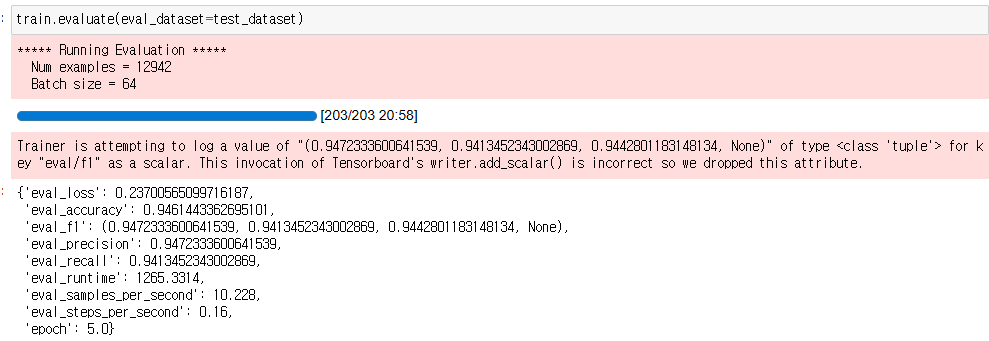

### `2차`

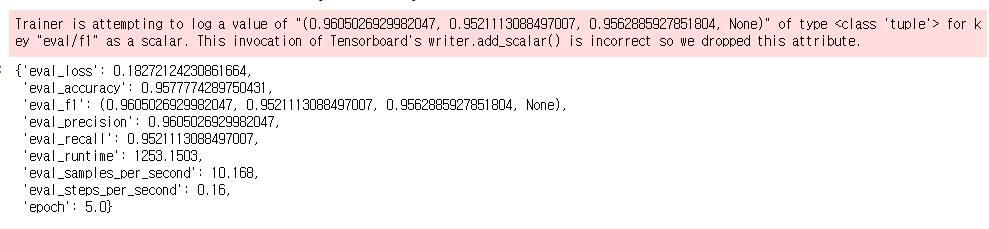

In [ ]:
import re

class predictModel() :

    def __init__(self, model_path):
        # load model
        self.model_path = model_path
        self.model = torch.load(model_path)
        # set device
        self.device = torch.device('cpu')
        # load tokenizer
        model_name = "beomi/KcELECTRA-base-v2022"
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)

    def predict_sentence(self, sent):
        self.model.eval()
#         sent = self.clean_sentence(sent)
        # tokenizing
        tokenized_sent = self.tokenizer(
            sent,
            return_tensors='pt',
            truncation=True,
            add_special_tokens=True,
            max_length=128
        )
        tokenized_sent.to(self.device)

        # prediction
        with torch.no_grad():
            outputs = self.model(
                input_ids=tokenized_sent['input_ids'],
                attention_mask=tokenized_sent['attention_mask'],
                token_type_ids=tokenized_sent['token_type_ids']
            )

        # result
        if len(sent) < 10 :
            # 10자 이하는 연락처 로 탐지하지 않음
            return 0

        result = outputs[0].detach().cpu().argmax(-1)
        #     print(outputs[0].detach().cpu())

        return int(result)
        # 0 : 정상, 1 : ( 무성의 or 연락처 탐지 )

In [ ]:
from datetime import datetime

today = str(datetime.today())[:10]
path = f"{today}_mu_model.pt"

# save model 
torch.save(model, path)

In [ ]:
from datetime import datetime

today = str(datetime.today())[:10]
path = f"{today}_mu_model.pt"

# save model 
torch.save(model, path)

In [ ]:
# load model
mod = torch.load(f"{today}_mu_model.pt")
mod.eval()

------

In [ ]:
import re

class Preprocessing():

    def __init__(self, sent):
        self.sent = sent

    def clean_sentence(self):
        try:  # 무성의
            self.sent = re.sub('[^\w\s]', ' ', self.sent).strip()
            self.sent = re.sub('[.,?!ᆢ~]', ', ', self.sent)
            self.sent = re.sub('[ㄱ-ㅎ|ㅏ-ㅣ]', 'ㅋ', self.sent)
            self.sent = re.sub('니다', '니다. ', self.sent)
            self.sent = re.sub('어요', '어요. ', self.sent)
            self.sent = re.sub('\n', ' ', self.sent).strip()

        except:
            print('clean_sentence method fail')
            pass

        return self.sent

    def f_clean_sentence(self):
        try:
            self.sent = re.sub('[^\w\s]', ' ', self.sent).strip()
            self.sent = re.sub('[.,?!ᆢ~]', ', ', self.sent)
            self.sent = self.return_text(self.sent)

        except:
            print('f_clean_sentence method fail')
            pass
        return self.sent

    def sub_num(self, sent):
        hannum_list = ['일', '이', '삼', '사', '오', '육', '륙', '칠', '팔', '구', '십', '영']
        sent = re.sub(r'[0-9]', ' ', sent)

        for i in hannum_list:
            sent = re.sub(rf'{i}', '  ', sent)
        return sent

    def return_target_list(self, pattern, sent):
        word_list = []
        for i in pattern.finditer(sent):
            target_word = sent[i.start(): i.end()]
            word_list.append(target_word)
        return word_list

    def return_text(self, sent):

        nam = '[남]+'
        nyeo = '[녀]+'
        yeo = '[여]+'
        son = '[아들]+'
        ddal = '[딸]+'
        num = '[\s]*(\d){1,2}[\s]*'
        han_num = '[일이삼사오육륙칠팔구십]+'

        person_list = [nam, son, nyeo, yeo, ddal]
        num_list = [num, han_num]

        for person_pattern in person_list:
            for num_pattern in num_list:
                pattern_list = [person_pattern + num_pattern, num_pattern + person_pattern]
                target_list = []

                for pattern in pattern_list:
                    add_pattern = re.compile(pattern)
                    m = add_pattern.findall(sent)
                    if m != []:
                        target_words = self.return_target_list(add_pattern, sent)
                        target_list += target_words
                    else:
                        pass

                for i in target_list:
                    sent = sent.replace(i, self.sub_num(i))
        return sent

In [ ]:
import torch.nn.functional as F

class predictModel():

    def __init__(self, model_path):
        # load model
        self.model_path = model_path
        self.model = torch.load(model_path)
        # set device
        self.device = torch.device('cpu')
        # load tokenizer
        model_name = 'beomi/KcELECTRA-base-2022'
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)

    def predict_sentence(self, sent):
        self.model.eval()
        Pr = Preprocessing(sent)

        if 'call' in str(self.model_path):
            sent = Pr.f_clean_sentence()

        else:
            sent = Pr.clean_sentence()

        # tokenizing
        tokenized_sent = self.tokenizer(
            sent,
            return_tensors='pt',
            truncation=True,
            add_special_tokens=True,
            max_length=512
        )
        tokenized_sent.to(self.device)

        # prediction
        with torch.no_grad():
            outputs = self.model(
                input_ids=tokenized_sent['input_ids'],
                attention_mask=tokenized_sent['attention_mask'],
                token_type_ids=tokenized_sent['token_type_ids']
            )

        # result
        per = int(str(np.array(F.softmax(outputs[0][0], dim=0).detach().cpu())[1] * 100).split('.')[0])
        result = outputs[0].detach().cpu().argmax(-1)

        if int(per) >= 99:
            return 1
        
        else:
            return 0

In [ ]:
import torch.nn.functional as F

class predictModel():

    def __init__(self, model_path):
        # load model
        self.model_path = model_path
        self.model = torch.load(model_path)
        # set device
        self.device = torch.device('cpu')
        # load tokenizer
        model_name = 'beomi/KcELECTRA-base-2022'
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)

    def predict_sentence(self, sent):
        self.model.eval()
        Pr = Preprocessing(sent)

        if 'call' in str(self.model_path):
            sent = Pr.f_clean_sentence()

        else:
            sent = Pr.clean_sentence()

        # tokenizing
        tokenized_sent = self.tokenizer(
            sent,
            return_tensors='pt',
            truncation=True,
            add_special_tokens=True,
            max_length=512
        )
        tokenized_sent.to(self.device)

        # prediction
        with torch.no_grad():
            outputs = self.model(
                input_ids=tokenized_sent['input_ids'],
                attention_mask=tokenized_sent['attention_mask'],
                token_type_ids=tokenized_sent['token_type_ids']
            )

        # result
        per = int(str(np.array(F.softmax(outputs[0][0], dim=0).detach().cpu())[1] * 100).split('.')[0])

        if len(sent) <= 5:
            # 10자 이하는 연락처 로 탐지하지 않음
            return 1, int(per)

        result = outputs[0].detach().cpu().argmax(-1)

        if int(result) == 0:
            return int(result), int(per)

        return int(result), int(per)

## 실 데이터 load

In [ ]:
import pymysql

# db 연동
conn = pymysql.connect(
    user='my_srv',              # 유저 이름
    passwd='wkrldi@duqhdi12',   # 패스워드
    host='125.141.223.156',     # 호스트
    db='m_yeoboya',             # 데이터베이스
    charset='utf8',             # 인코딩
    port=33141                  # 포트 번호(''없이 사용)
)

cursor = conn.cursor(pymysql.cursors.DictCursor)
sql1 = "SELECT mem_no, mate_conts, family_conts, list_prt_yn FROM m_yeoboya.member_mate WHERE list_prt_yn='y'" 
cursor.execute(sql1)
result1 = cursor.fetchall()


cursor.close()
all_mate_df = pd.DataFrame(result1) 

# 
display(all_mate_df)

In [ ]:
result = all_mate_df.copy()
result = result[['mem_no','mate_conts', 'family_conts']]
result

In [ ]:
mu_model = predictModel(model_path = f"{today}_mu_model.pt")

In [ ]:
from tqdm import tqdm

In [ ]:
for row in tqdm(range(result.shape[0])):
    text = result.loc[row, 'mate_conts']
    f_text = result.loc[row,'family_conts']
    result.loc[row,'mu_result'], result.loc[row,'mu_per'] = mu_model.predict_sentence(str(text))
    result.loc[row,'f_mu_result'], result.loc[row,'f_mu_per'] = mu_model.predict_sentence(str(f_text))